In [1]:
### File Originally Created By Bipul Pandey on 9th Feb 2024

### Python Version - 3.9.12
### Scipy Version - 1.7.3
### Matplotlib Version -  3.5.1 
### numpy Version -  1.21.6 
### Pandas Version - 1.4.2


## This notebook contains the following:
    #   1) Visualization of Strain vs KP Suppression landscape


## The relevant dataset is the projection of original experiment's Strain presence-absence data into PC1 and PC2 and the KP CFU of these experiments.
## The Principal component analysis was done on raw dataset containing measurements of KP CFU at 120 Hours and the Strain presence/absence matrix for the experiments

## Name of the Dataset : "PCA_coordinates_Strain_Presence_Absence_Space_Original_96_actual.csv"

In [2]:
## Loading Relevant Packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.interpolate import griddata



from mpl_toolkits.mplot3d import Axes3D




___
### A. Reading the Dataset and Partitioning it into relevant data and labels:

- We first read the file containing the PC-1 and PC-2 coordinates of experiments in strain presence-absence space as wel as the KP loads at the end of 120 hours. This data is in the file with the following name   - [PCA_coordinates_Strain_Presence_Absence_Space_Original_96_actual.csv].

- This file can be found in the [Datasets] folder.

- We then create separate arrays containing the respective community names, experiment coordinates, and $Log_{10}[KP CFU]$ of all experiment. 

        Variable(Experiment_names) contains =community names
        Variable(Points array) contains experiment coordinates in PC 1-2 space
        Variable(Values) contains Log 10 of KP CFU

_____
_____

In [6]:
## Loading the Principal component information about communities


Dataset_array = pd.read_csv("../Datasets/PCA_coordinates_Strain_Presence_Absence_Space_Original_96_actual.csv")

Values = Dataset_array["Log10(KP-CFU)"]
Values_suppression = np.max(Values) - Values
Experiment_names = Dataset_array["Community"]
Point_array = np.array(Dataset_array[Dataset_array.columns[1:3]]) 

______
______
#### B. Plotting the experiments in Principal Component Space :
        The colors represent Log[KP CFU] for that community. 

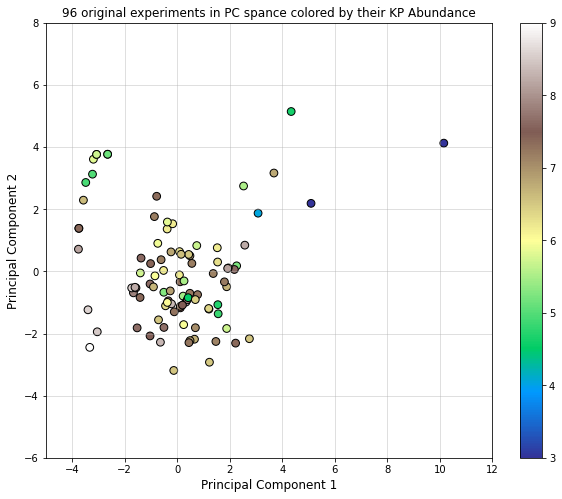

In [7]:
Vmax = 9   ## <= Maximum possible KP CFU. This is when KP is grown alone"

Vmin = 3  ## <= Anything below KP CFU= 10^4  is same color"

plt.figure(figsize=(10,8))
plt.scatter(Point_array[:,0],Point_array[:,1] ,c = Values, vmax=Vmax, vmin =Vmin,cmap = "terrain", edgecolors="black", s=60)
plt.colorbar()
plt.xlabel("Principal Component 1", fontsize = 12)
plt.ylabel("Principal Component 2", fontsize = 12)
plt.title("96 original experiments in PC spance colored by their KP Abundance")
plt.grid( alpha = 0.5)
plt.xlim(-5,12)
plt.ylim(-6,8)
plt.show()

_____
_____
### C. Construction of the surface plots for the strain landscape in PC-1 /PC-2 space:

The steps are as follows:

- X and Y axes are PC-1 and PC-2 axes. Z axis is for the KP suppression. ("Blues" imply larger KP suppression, "Whites" imply low or no KP suppression)
- Construct a meshgrid large enought to capture all the experiments visualized in PC-1, PC-2 space. (Refer to section B.d.) ( x_low, x_high, y_low, y_high are the X and Y bounds)
- num_points controls the resolution of the meshgrid. The higher this value, the better resolution of plots. (But rendering becomes slower)
- grid_x, grid_y contain the X and Y coordinates of all the points in the grid.
- grid_z1 contains the linear interpolation supression values for all points in the meshgrid.





In [8]:
### Generating the Surface plots


### The X-Y meshgrid grid for plotting the landscape:
x_low = -12
x_high = 12
y_low = -12
y_high = 12
num_points = 1000   #<= Increase this for higher resolution surfaces. But slow render

grid_x, grid_y = np.meshgrid(np.linspace(x_low, x_high, num_points),np.linspace(y_low, y_high, num_points), indexing='ij')

#We will linearly interpolate between the points

grid_z1 = griddata(Point_array, Values_suppression, (grid_x, grid_y), method='linear')

_____
______
#### D. Plotting this meshgrid heatmap. 

We can visualize this heatmap or landscape in two ways.
    
    - 2D aerial view.
    - 3D hillside view.




### 2D Aerial View:
Parameter:
'$\text{v\_max}$' 

It is the parameter that controls what is the cutoff for the color scheme. Any value beyond this is of the same color.

In our case, if $\text{v\_max} = 5$ , that means KP suppression by of 5 orders of magnitude or lower (i.e $log_{10}[\text{KP CFU}]\leq 4$) will be of same color (Deep Blue).
This information is also reflected in the colorbars

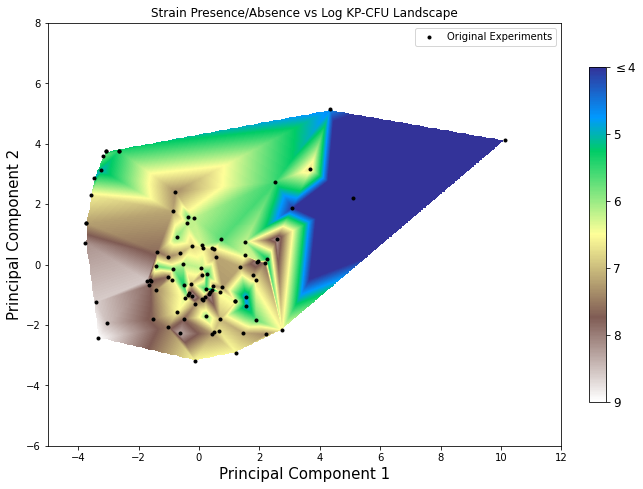

In [9]:
### Plotting Strain Presence Absence vs KP Supression in 2D aerial view
v_max = 5
### Here we have shifted the color bar from Order of magnitude Supression to order of magnitude KP

plt.figure(figsize=(10,10))
plt.imshow(grid_z1.T, extent=(x_low,x_high,y_low,y_high), origin='lower', vmax=v_max ,cmap = "terrain_r")
#plt.imshow(grid_z1.T, extent=(-20,20,-20,20), origin='lower', cmap = "terrain_r")
plt.plot(Point_array[:, 0], Point_array[:, 1], 'ko', ms=3, label = "Original Experiments")
plt.xlim(-5,12)
plt.ylim(-6,8)
cb = plt.colorbar( fraction = 0.03)
cb.set_ticks(range(0,6))
cb.ax.set_yticklabels([9,8,7,6,5,r'$\leq 4$'], fontsize = 12)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize =15)
plt.title(r"Strain Presence/Absence vs Log KP-CFU Landscape")
plt.legend()
plt.show()

#### 3D Hillside View:


The 3D hillside view requires additional parameters along with 'v_max' for the camera setup and resolution. These are 

    - elev = elevation angle
    - azim = azimuthal angle
    - stride = Quality of rendering the meshgrid.


We have additionally included the shadow of the landscape for the ease of visualization. 


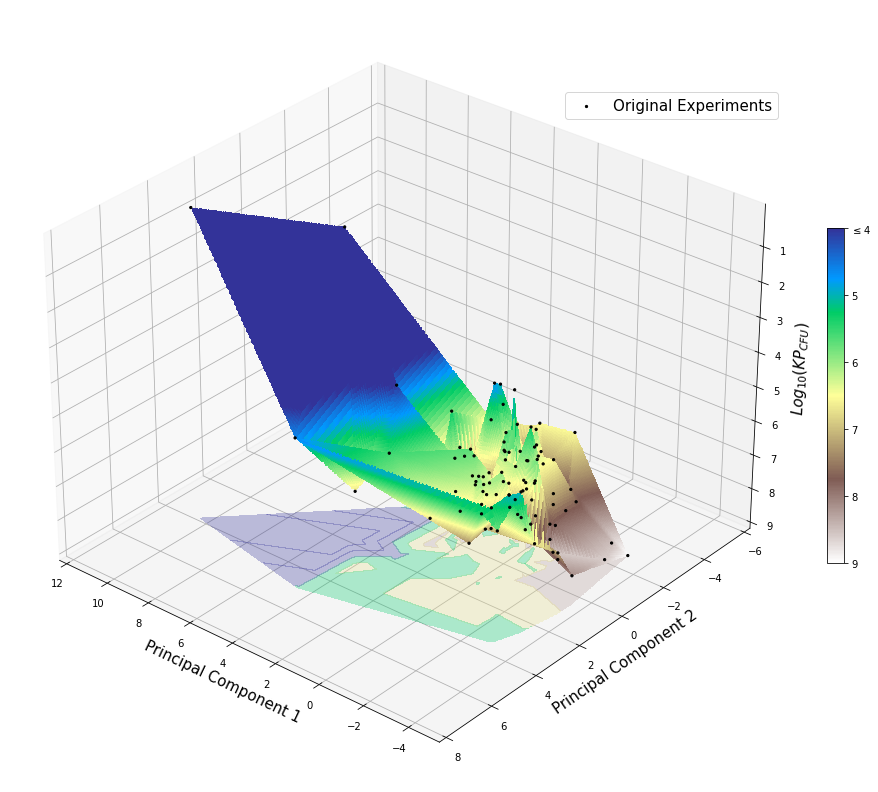

In [10]:
### We will now visualize this heatmap in 3 dimensions using mpl_toolkits (3D hillside view)
from mpl_toolkits.mplot3d import Axes3D

### Camera angle parameters
elev = 30
azim = 130
stride = 2

## Colour parameter
kolor = 'terrain_r'
#kolor = "coolwarm"

fig1 = plt.figure( figsize=(15,15))
ax1 = fig1.add_subplot(projection='3d')


### the scatter plot of original experiments
ax1.scatter3D(Point_array[:,0], Point_array[:,1], Values_suppression, color = "black", alpha = 1, s = 5, zorder = 1, marker = "o",label = "Original Experiments")


### the contour plot in 2D to visualize the floor. - makes it easy to visualize the heights
cset = ax1.contourf(grid_x, grid_y,grid_z1, zdir='z', vmin = 0, vmax=v_max, offset=0, cmap=kolor, alpha = 0.3, zorder = 0)


## The actual 3D surface  
surf = ax1.plot_surface(grid_x,grid_y,grid_z1,cmap = kolor,vmax=v_max, vmin = 0, zorder = 3,antialiased=False, alpha = 1, rstride = stride, cstride = stride)
cb= plt.colorbar(surf, ax = ax1, fraction = 0.02)
cb.set_ticks(range(0,6))
cb.ax.set_yticklabels([9,8,7,6,5,r'$\leq 4$'])


ax1.view_init(elev, azim)
ax1.set_xlim(-5,12)
ax1.set_ylim(-6,8)
ax1.set_zlim(0,9)
ax1.set_xlabel("Principal Component 1", fontsize = 15)
ax1.set_ylabel("Principal Component 2", fontsize = 15)
ax1.set_zlabel(r"${Log}_{10}(KP_{CFU})$",fontsize = 15)
ax1.xaxis.label.set_rotation(0)
ax1.set_zticks(range(0,9), range(9,0, -1))
plt.legend(bbox_to_anchor=(0.5, 0.4, 0.5, 0.5), fontsize = 15)



#To save figure, uncomment the following line
#plt.savefig("Strain_Space_Principal_component_landscape.pdf", dpi = 300)

plt.show()